In [2]:
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('orderbooks.csv', index_col=0)
df.describe()

,ask_p_0,ask_p_1,ask_p_2,ask_p_3,ask_p_4,ask_p_5,ask_p_6,ask_p_7,ask_p_8,ask_p_9,...,bid_vol_0,bid_vol_1,bid_vol_2,bid_vol_3,bid_vol_4,bid_vol_5,bid_vol_6,bid_vol_7,bid_vol_8,bid_vol_9
count,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,...,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03,6.739000e+03
mean,6426.996735,6427.501929,6428.003339,6428.506826,6429.008310,6429.510239,6430.011723,6430.512539,6431.012836,6431.513133,...,1.958697e+06,6.864644e+05,3.356255e+05,2.789920e+05,3.842633e+05,2.837210e+05,3.763194e+05,2.960251e+05,4.239624e+05,3.986108e+05
std,16.750431,16.765170,16.768765,16.776215,16.779554,16.785012,16.789146,16.791288,16.792105,16.792836,...,1.064392e+06,5.696753e+05,3.681069e+05,3.704174e+05,4.031981e+05,2.208428e+05,2.656393e+05,2.371099e+05,2.670244e+05,3.692991e+05
min,6404.000000,6404.500000,6405.000000,6405.500000,6406.000000,6406.500000,6407.000000,6407.500000,6408.000000,6408.500000,...,1.250000e+02,2.500000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,2.500000e+01,2.600000e+01,3.200000e+01,2.600000e+01
25%,6409.500000,6410.000000,6410.500000,6411.000000,6411.500000,6412.000000,6412.500000,6413.000000,6413.500000,6414.000000,...,1.075854e+06,3.931950e+05,1.138960e+05,9.339700e+04,1.087825e+05,1.462750e+05,1.768230e+05,1.385790e+05,2.514805e+05,1.867150e+05
50%,6436.500000,6437.000000,6437.500000,6438.000000,6438.500000,6439.000000,6439.500000,6440.000000,6440.500000,6441.000000,...,2.071808e+06,5.149730e+05,2.344330e+05,1.675280e+05,2.739950e+05,2.414390e+05,3.192110e+05,2.510950e+05,4.025830e+05,3.097590e+05
75%,6442.000000,6442.500000,6443.000000,6443.500000,6444.000000,6444.500000,6445.000000,6445.500000,6446.000000,6446.500000,...,2.758507e+06,7.477985e+05,4.318375e+05,2.729835e+05,4.329430e+05,3.789370e+05,5.638760e+05,3.622990e+05,5.445220e+05,4.436900e+05
max,6490.000000,6490.500000,6491.000000,6491.500000,6492.000000,6492.500000,6493.000000,6493.500000,6494.000000,6494.500000,...,6.578238e+06,5.147699e+06,4.270761e+06,3.045844e+06,3.074397e+06,3.261804e+06,3.121850e+06,2.864902e+06,2.553947e+06,2.585494e+06


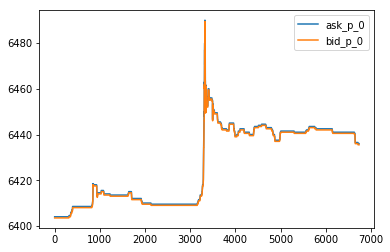

In [6]:
df[['ask_p_0', 'bid_p_0']].plot()

In [7]:
for i in range(10):
    ind = str(i)
    df['spreed_'+ind] = df['ask_p_'+ind] - df['bid_p_'+ind]
    df['mid_p'+ind] = (df['ask_p_'+ind] + df['bid_p_'+ind]) / 2
    
for i in range(9):
    ind = str(i+1)
    df['ask_p_diff_'+ind+'_0'] = df['ask_p_'+ind] - df['ask_p_0']
    df['bid_p_diff_'+ind+'_0'] = df['bid_p_'+ind] - df['bid_p_0']
    ind1 = str(i)
    df['ask_p_diff_'+ind+'_'+ind1] = df['ask_p_'+ind] - df['ask_p_'+ind1]
    df['bid_p_diff_'+ind+'_'+ind1] = df['bid_p_'+ind] - df['bid_p_'+ind1]
    
l1, l2, l3, l4 = [], [], [], []
for i in range(10):
    ind = str(i)
    l1.append('ask_p_'+ind)
    l2.append('bid_p_'+ind)
    l3.append('ask_vol_'+ind)
    l4.append('bid_vol_'+ind)
df['ask_p_mean'] = df[l1].mean(axis=1)
df['bid_mean'] = df[l2].mean(axis=1)
df['ask_vol_mean'] = df[l3].mean(axis=1)
df['bid_vol_mean'] = df[l4].mean(axis=1)

l = []
template = 'spreed_{0}'
for i in range(10):
    l.append(template.format(i))
df['accum_spreed'] = df[l].sum(axis=1)

for i in range(10):
    ind = str(i)
    df['spreed_vol_'+ind] = df['ask_vol_'+ind] - df['bid_vol_'+ind]
l = []
template = 'spreed_vol_{0}'
for i in range(10):
    l.append(template.format(i))
df['accum_spreed_vol'] = df[l].sum(axis=1)

In [8]:
import numpy as np
df['y'] = np.where(df['mid_p0'].shift(1) > df['mid_p0'] , 1, 0)
df['y'] = np.where(df['mid_p0'].shift(1) < df['mid_p0'] , -1, df['y'])
df['y'].value_counts()

 0    6522
-1     115
 1     102
Name: y, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.33, random_state=42)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional     scklearn functions

import matplotlib.pyplot as plt

ind_params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 0.8, 
              'objective': 'binary:logistic', 'min_child_weight': 3, 'max_depth': 7,
             'subsample': 0.9, 'learning_rate': 0.1, 'eval_metric': 'mlogloss'}

# clf = XGBClassifier(learning_rate =0.01, n_estimators=2000, max_depth=6,
#  min_child_weight=1, max_delta_step = 5, gamma=0, subsample=0.85, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, reg_alpha= 0.01)
clf = XGBClassifier(**ind_params)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-mlogloss:0.960974	validation_1-mlogloss:0.961673
[1]	validation_0-mlogloss:0.846576	validation_1-mlogloss:0.848047
[2]	validation_0-mlogloss:0.749729	validation_1-mlogloss:0.751994
[3]	validation_0-mlogloss:0.667224	validation_1-mlogloss:0.6703
[4]	validation_0-mlogloss:0.595572	validation_1-mlogloss:0.599856
[5]	validation_0-mlogloss:0.533771	validation_1-mlogloss:0.538554
[6]	validation_0-mlogloss:0.479387	validation_1-mlogloss:0.485102
[7]	validation_0-mlogloss:0.431344	validation_1-mlogloss:0.438262
[8]	validation_0-mlogloss:0.388966	validation_1-mlogloss:0.396932
[9]	validation_0-mlogloss:0.351945	validation_1-mlogloss:0.360538
[10]	validation_0-mlogloss:0.318897	validation_1-mlogloss:0.32825
[11]	validation_0-mlogloss:0.289253	validation_1-mlogloss:0.299755
[12]	validation_0-mlogloss:0.262719	validation_1-mlogloss:0.274276
[13]	validation_0-mlogloss:0.23879	validation_1-mlogloss:0.251686
[14]	validation_0-mlogloss:0.217366	validation_1-mlogloss:0.231448
[15]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric='mlogloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.9)

In [19]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)

In [20]:
f1_score(y_test, y_pred, average='macro')

0.6859941210110437

In [22]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.79      0.53      0.63        36
           0       0.99      0.99      0.99      2162
           1       0.50      0.38      0.43        26

   micro avg       0.98      0.98      0.98      2224
   macro avg       0.76      0.64      0.69      2224
weighted avg       0.98      0.98      0.98      2224

